<h1>Import Libraries</h1>

In [3]:
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
#to do visualization done below the code
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC

<h1>Set Data Path</h1>

In [4]:
Data_path = './Data/titanic.csv'

In [5]:
df = pd.read_csv(Data_path)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df.shape

(1310, 14)

<h1>Data Set for Training</h1>

In [9]:
train_df = df.sample(frac=0.8,random_state=42)


<h1>Data Set for Testing</h1>

In [10]:
test_df = df.drop(train_df.index)

<h1>Reset Indexing & Use them</h1>

In [11]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [12]:
train_df.shape

(1048, 15)

In [13]:
test_df.shape

(262, 15)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1048 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   name       1047 non-null   object 
 4   sex        1047 non-null   object 
 5   age        839 non-null    float64
 6   sibsp      1047 non-null   float64
 7   parch      1047 non-null   float64
 8   ticket     1047 non-null   object 
 9   fare       1046 non-null   float64
 10  cabin      241 non-null    object 
 11  embarked   1045 non-null   object 
 12  boat       383 non-null    object 
 13  body       96 non-null     float64
 14  home.dest  602 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 122.9+ KB


In [16]:
train_df.describe()

,index,pclass,survived,age,sibsp,parch,fare,body
count,1048.000000,1047.000000,1047.000000,839.000000,1047.000000,1047.000000,1046.000000,96.000000
mean,648.078244,2.282713,0.375358,30.004172,0.488061,0.362942,34.303509,156.968750
std,377.423892,0.839009,0.484447,14.424104,1.065539,0.799188,54.240092,97.279895
min,0.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,1.000000
25%,322.750000,1.500000,0.000000,21.000000,0.000000,0.000000,7.895800,69.750000
50%,646.500000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.500000
75%,970.250000,3.000000,1.000000,39.000000,1.000000,0.000000,31.387500,255.250000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,328.000000


In [60]:
train_df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,not_alone
0,701,3.0,0.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,NaN,S,NaN,NaN,NaN,0.0,1
1,994,3.0,0.0,"Mardirosian, Mr. Sarkis",male,NaN,0.0,0.0,2655,7.2292,F E46,C,NaN,NaN,NaN,0.0,1
2,350,2.0,1.0,"Brown, Miss. Edith Eileen",female,15.0,0.0,2.0,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA",2.0,0
3,986,3.0,0.0,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0.0,0.0,STON/O 2. 3101275,7.1250,NaN,S,NaN,NaN,NaN,0.0,1
4,409,2.0,0.0,"Fox, Mr. Stanley Hubert",male,36.0,0.0,0.0,229236,13.0000,NaN,S,NaN,236.0,"Rochester, NY",0.0,1


<h1>Missing Data</h1>

In [25]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,2)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','% Percentage'])
missing_data

,Total,% Percentage
body,952,90.84
cabin,807,77.00
boat,665,63.45
home.dest,446,42.56
age,209,19.94
embarked,3,0.29
fare,2,0.19
pclass,1,0.10
survived,1,0.10
name,1,0.10


In [26]:
train_df.columns.values

array(['index', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'], dtype=object)

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

Text(0.5, 1.0, 'Male')

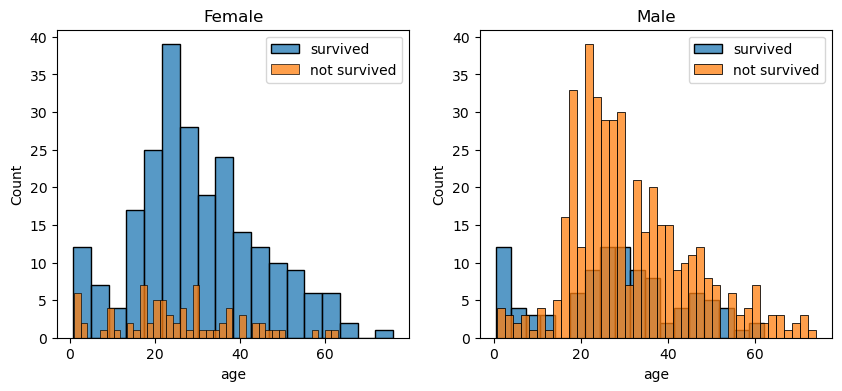

In [40]:
survived = 'survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows = 1 , ncols = 2 ,figsize = (10,4))
women = train_df[train_df['sex']=='female']
men = train_df[train_df['sex']=='male']
ax = sns.histplot(women[women['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax = sns.histplot(women[women['survived']==0].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax = sns.histplot(men[men['survived']==0].age.dropna(),bins=40,label='not survived',ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')


c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

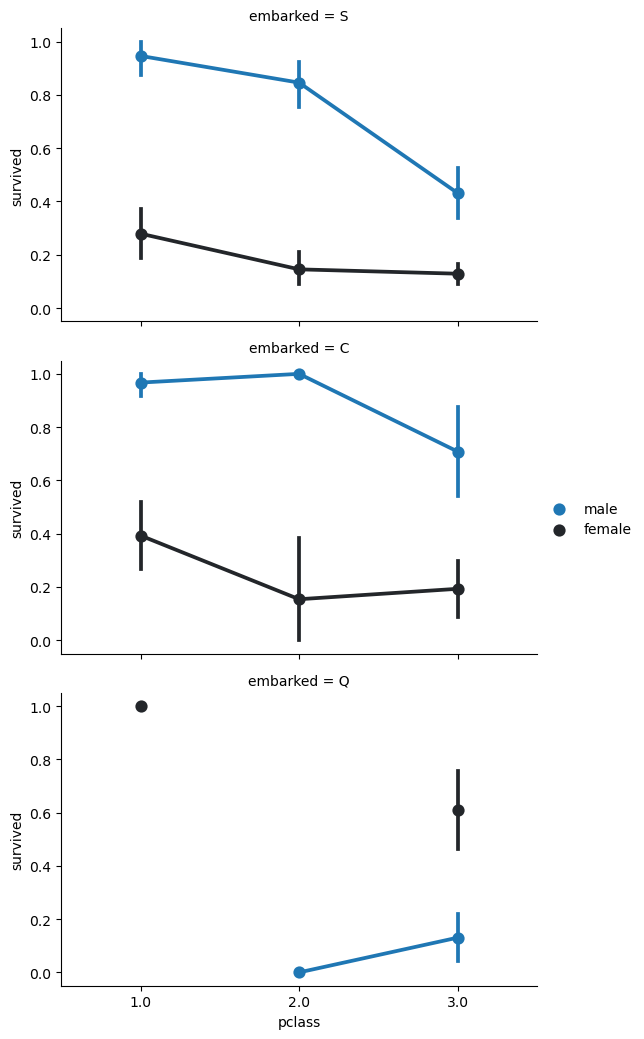

In [41]:
FacetGrid = sns.FacetGrid(train_df,row='embarked',height= 3.5 , aspect=1.6)
FacetGrid.map(sns.pointplot,'pclass','survived','sex',palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pclass', ylabel='survived'>

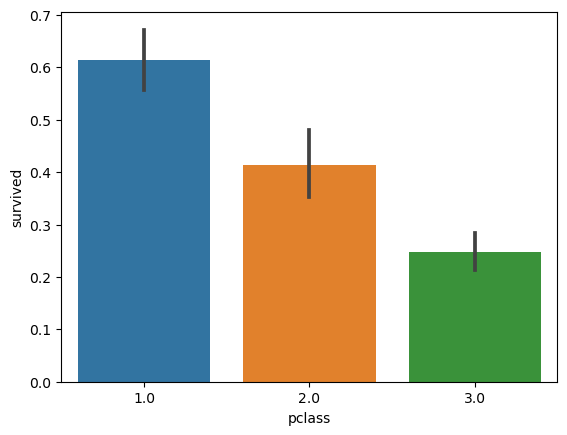

In [42]:
sns.barplot(x='pclass',y='survived',data =train_df)

In [47]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].fillna(0).astype(int)
train_df['not_alone'].value_counts()

not_alone
1    640
0    408
Name: count, dtype: int64

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

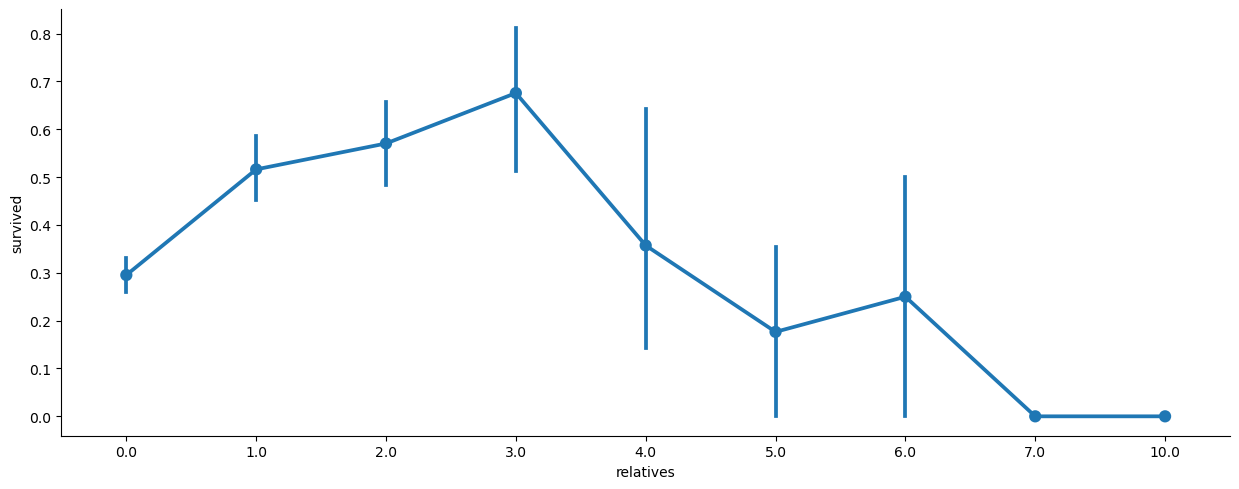

In [55]:
axes = sns.catplot(x='relatives', y='survived', data=train_df, aspect=2.5, kind='point')

<h1>Data Preprocessing & Feature Engineering</h1>

In [ ]:
# train_df = train_df.drop(['body'],axis=1)

In [67]:
import re
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data = [train_df,test_df]

for dataset in data:
    dataset['cabin'] = dataset["cabin"].fillna('U0')
    dataset['Deck'] = dataset["cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['cabin'],axis=1)
test_df = test_df.drop(['cabin'],axis=1)

KeyError: 'cabin'

In [70]:
train_df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Deck
0,701,3.0,0.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,S,NaN,NaN,NaN,0.0,1,8
1,994,3.0,0.0,"Mardirosian, Mr. Sarkis",male,NaN,0.0,0.0,2655,7.2292,C,NaN,NaN,NaN,0.0,1,6
2,350,2.0,1.0,"Brown, Miss. Edith Eileen",female,15.0,0.0,2.0,29750,39.0000,S,14,NaN,"Cape Town, South Africa / Seattle, WA",2.0,0,8
3,986,3.0,0.0,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0.0,0.0,STON/O 2. 3101275,7.1250,S,NaN,NaN,NaN,0.0,1,8
4,409,2.0,0.0,"Fox, Mr. Stanley Hubert",male,36.0,0.0,0.0,229236,13.0000,S,NaN,236.0,"Rochester, NY",0.0,1,8


<h3>Missing Age values become Random Age Value<h3>

In [106]:
data = [train_df,test_df]
for dataset in data:
    mean = train_df['age'].mean()
    std = test_df['age'].std()
    is_null = dataset['age'].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    #fill NaN values in Age column with random values generated
    age_slice =  dataset['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['age'] = age_slice
    dataset['age'] = train_df['age'].astype(int)
train_df['age'].isnull().sum()

0

<h3>Missing Embarked values become Common Value<h3>

In [72]:
train_df['embarked'].describe()

count     1045
unique       3
top          S
freq       734
Name: embarked, dtype: object

In [73]:
common_value = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [74]:
train_df['embarked'].describe()

count     1048
unique       3
top          S
freq       737
Name: embarked, dtype: object

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1048 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   name       1047 non-null   object 
 4   sex        1047 non-null   object 
 5   age        1048 non-null   int32  
 6   sibsp      1047 non-null   float64
 7   parch      1047 non-null   float64
 8   ticket     1047 non-null   object 
 9   fare       1046 non-null   float64
 10  embarked   1048 non-null   object 
 11  boat       383 non-null    object 
 12  body       96 non-null     float64
 13  home.dest  602 non-null    object 
 14  relatives  1047 non-null   float64
 15  not_alone  1048 non-null   int32  
 16  Deck       1048 non-null   int32  
dtypes: float64(7), int32(3), int64(1), object(6)
memory usage: 127.0+ KB


<h3>Change Data type & fill missing (NaN) values in column with the specified value<h3>

In [90]:
data = [train_df,test_df]
for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1048 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   sex        1047 non-null   float64
 4   age        1048 non-null   int32  
 5   sibsp      1047 non-null   float64
 6   parch      1047 non-null   float64
 7   ticket     1047 non-null   object 
 8   fare       1048 non-null   int32  
 9   embarked   1048 non-null   object 
 10  boat       383 non-null    object 
 11  body       96 non-null     float64
 12  home.dest  602 non-null    object 
 13  relatives  1047 non-null   float64
 14  not_alone  1048 non-null   int32  
 15  Deck       1048 non-null   int32  
 16  Title      1048 non-null   float64
dtypes: float64(8), int32(4), int64(1), object(4)
memory usage: 122.9+ KB


In [82]:
data = [train_df,test_df]
titles = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
    #extract titles
    dataset['Title'] = dataset.name.str.extract('([A-za-z]+)\.',expand = False)
    #replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

    #convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    #filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['name'],axis=1)
test_df = test_df.drop(['name'],axis=1)

In [88]:
genders = {'male':0,'female':1}

data = [train_df,test_df]
for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [105]:
train_df.head()

,index,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,relatives,not_alone,Deck,Title
0,701,3.0,0.0,0.0,0,0.0,0.0,8,0,NaN,NaN,NaN,0.0,1,8,1.0
1,994,3.0,0.0,0.0,0,0.0,0.0,7,1,NaN,NaN,NaN,0.0,1,6,1.0
2,350,2.0,1.0,1.0,0,0.0,2.0,39,0,14,NaN,"Cape Town, South Africa / Seattle, WA",2.0,0,8,2.0
3,986,3.0,0.0,0.0,0,0.0,0.0,7,0,NaN,NaN,NaN,0.0,1,8,1.0
4,409,2.0,0.0,0.0,0,0.0,0.0,13,0,NaN,236.0,"Rochester, NY",0.0,1,8,1.0


In [93]:
train_df['ticket'].describe()

count         1047
unique         787
top       CA. 2343
freq            10
Name: ticket, dtype: object

In [94]:
#Because of high uniquness of Ticket Attribute it should be removed
train_df = train_df.drop(['ticket'],axis=1)
test_df = test_df.drop(['ticket'],axis=1)

In [98]:
train_df['embarked'].describe()

count     1048
unique       3
top          S
freq       737
Name: embarked, dtype: object

In [99]:
ports = {"S":0,"C":1,"Q":2}
data = [train_df,test_df]

for dataset in data:
    dataset['embarked'] = dataset["embarked"].map(ports)

In [104]:
data = [train_df, test_df]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[dataset['age'] > 66, 'age'] = 7

# Show how it's distributed
train_df['age'].value_counts()


age
0    1048
Name: count, dtype: int64